In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("zomato.csv", encoding='latin1')
zomato = df.copy()


# Data Analyzing

In [25]:
zomato.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_") for col in zomato.columns]


In [26]:
print(zomato.columns.tolist())


['address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype']


In [27]:
print(zomato.columns)

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_costfor_two_people', 'listed_intype'],
      dtype='object')


In [28]:
zomato = zomato[zomato['rate'].notnull()].copy()  
zomato.loc[:, 'rate'] = zomato['rate'].apply(lambda x: x.split('/')[0].strip() if isinstance(x, str) else x)
zomato.loc[:, 'rate'] = pd.to_numeric(zomato['rate'], errors='coerce')


if 'approx_cost_for_two_people' in zomato.columns:
    zomato.loc[:, 'approx_cost_for_two_people'] = zomato['approx_cost_for_two_people'].astype(str).str.replace(',', '')
    zomato.loc[:, 'approx_cost_for_two_people'] = pd.to_numeric(zomato['approx_cost_for_two_people'], errors='coerce')

if 'votes' in zomato.columns:
    zomato.loc[:, 'votes'] = pd.to_numeric(zomato['votes'], errors='coerce')


In [29]:
zomato[['rate', 'votes', 'approx_costfor_two_people']]


,rate,votes,approx_costfor_two_people
0,4.1,775,800.0
1,4.1,787,800.0
2,3.8,918,800.0
3,3.7,88,300.0
4,3.8,166,600.0
...,...,...,...
56244,3.7,34,800.0
56246,2.5,81,800.0
56247,3.6,27,1500.0
56250,4.3,236,2500.0


In [30]:
print("Columns:", zomato.columns.tolist())


print("\nSummary Statistics:")
print(zomato[['rate', 'votes', 'approx_costfor_two_people']].describe())


print("\nUnique Counts:")
print("Locations:", zomato['location'].nunique())
print("Restaurant Types:", zomato['rest_type'].nunique())
print("Cuisines:", zomato['cuisines'].nunique())
print("Online Order Options:", zomato['online_order'].unique())
print("Table Booking Options:", zomato['book_table'].unique())


print("\nMost Common:")
print("Location:", zomato['location'].mode()[0])
print("Restaurant Type:", zomato['rest_type'].mode()[0])
print("Cuisine:", zomato['cuisines'].mode()[0])


zomato['approx_costfor_two_people'] = zomato['approx_costfor_two_people'].astype(str).str.replace(',', '')
zomato['approx_costfor_two_people'] = pd.to_numeric(zomato['approx_costfor_two_people'], errors='coerce')

print("\nCorrelation Matrix:")
print(zomato[['rate', 'votes', 'approx_costfor_two_people']].corr())


print("\nTop 10 Most Voted Restaurants:")
print(zomato[['name', 'votes']].sort_values(by='votes', ascending=False).head(10))


Columns: ['address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype']

Summary Statistics:
               rate         votes  approx_costfor_two_people
count  41665.000000  41665.000000               41418.000000
mean       3.700449    351.653018                 603.268048
std        0.440513    881.800960                 464.327857
min        1.800000      0.000000                  40.000000
25%        3.400000     21.000000                 300.000000
50%        3.700000     73.000000                 500.000000
75%        4.000000    276.000000                 700.000000
max        4.900000  16832.000000                6000.000000

Unique Counts:
Locations: 92
Restaurant Types: 88
Cuisines: 2384
Online Order Options: ['Yes' 'No']
Table Booking Options: ['Yes' 'No']

Most Common:
Location: BTM
Restaurant Type: Quick Bites
Cuisine: North Indian

Correlation Matrix:
           

# Data Visualization

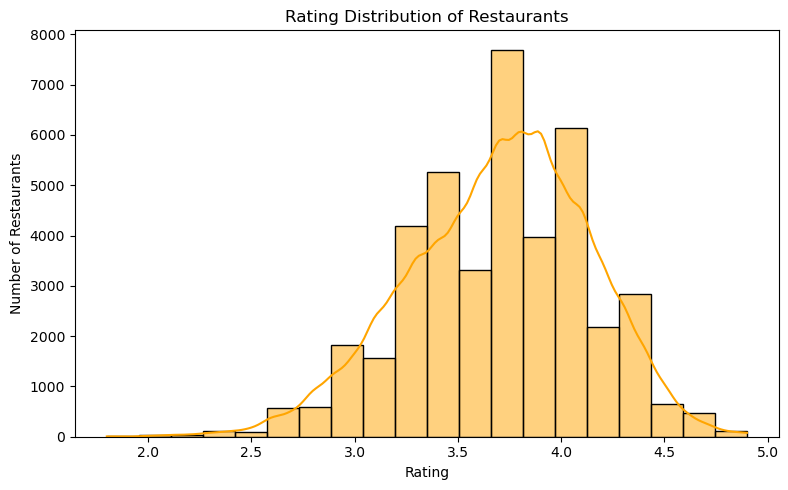

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(zomato['rate'], bins=20, kde=True, color='orange')
plt.title('Rating Distribution of Restaurants')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()


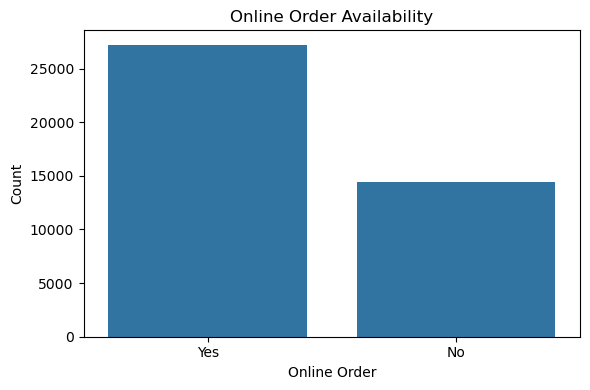

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(data=zomato, x='online_order')
plt.title('Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


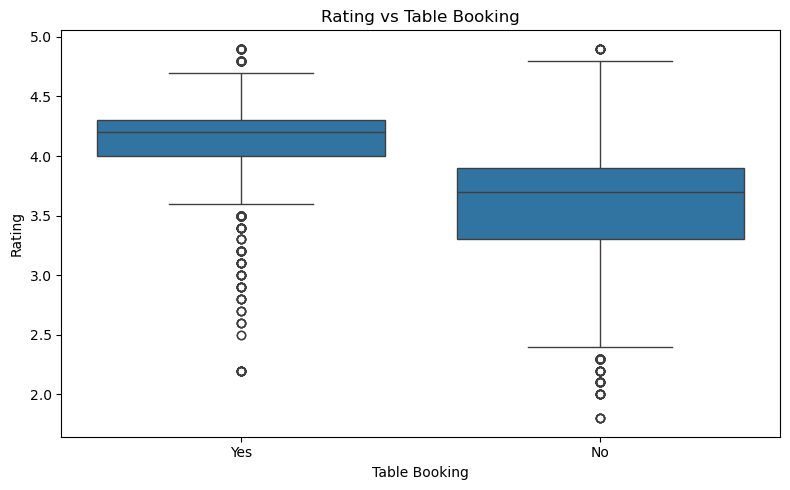

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=zomato, x='book_table', y='rate')
plt.title('Rating vs Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


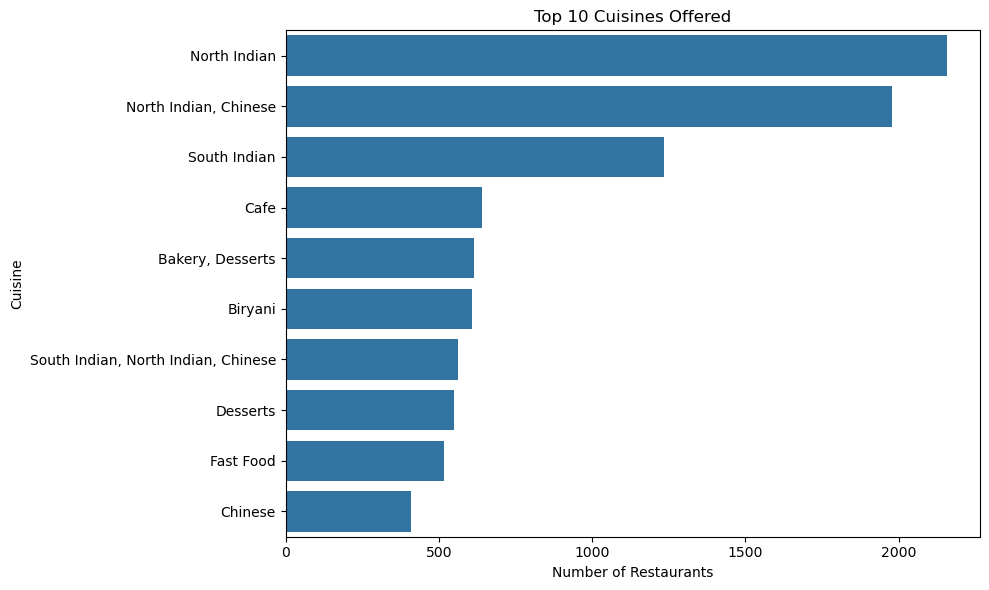

In [43]:
top_cuisines = zomato['cuisines'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines Offered')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


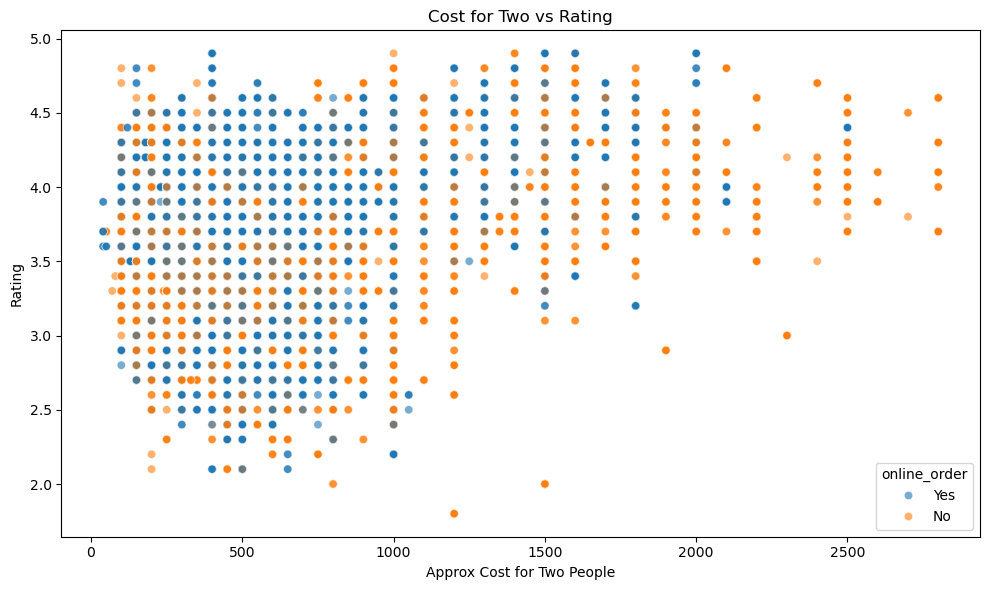

In [46]:
filtered = zomato[zomato['approx_costfor_two_people'] < 3000]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x='approx_costfor_two_people', y='rate', hue='online_order', alpha=0.6)
plt.title('Cost for Two vs Rating')
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()
